<a href="https://colab.research.google.com/github/dibesmab-cyber/d/blob/main/eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/diyanet_yorumlar_youtube(in).csv")

In [103]:
import pandas as pd
import re

df = pd.read_csv("/content/diyanet_yorumlar_youtube(in).csv")

def duration_to_seconds(duration):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not match:
        return None
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0
    return hours * 3600 + minutes * 60 + seconds

df["Video_Süresi_Saniye"] = df["Video Süresi"].apply(duration_to_seconds)


df.to_csv("diyanet_yorumlar_guncel.csv", index=False) #yeni csvye kaydet

print(df[["Video Süresi", "Video_Süresi_Saniye"]].head())


  Video Süresi  Video_Süresi_Saniye
0      PT9M16S                  556
1      PT9M16S                  556
2      PT9M16S                  556
3      PT9M16S                  556
4      PT9M16S                  556


In [104]:
df = pd.read_csv("/content/diyanet_yorumlar_guncel.csv")

In [105]:

print("Tekrarlayan satır sayısı", df.duplicated().sum())


Tekrarlayan satır sayısı 0


In [106]:
# veriyle ilgili temel incelemeler
#
print("🔹 Veri Boyutu:", df.shape)
print("\n🔹 İlk 5 Satır:")
print(df.head()) #direkt df.head(5) de olur genel yapıyı görmek/kontrol etmek için

print("\n🔹 Veri Hakkında Bilgi:")
print(df.info())

print("\n🔹 Eksik Değerler:")
print(df.isnull().sum())

print("\n🔹 Temel İstatistikler:")
print(df.describe()) #sayısal sutunlar icin
df.describe(include='object') #kategorik sutunlar icin

🔹 Veri Boyutu: (12243, 15)

🔹 İlk 5 Satır:
           Yorum Yapan                                              Yorum  \
0     @muhlisozcan5809  Olan diyanet camiye gelen muslumana soyluyor, ...   
1      @suayipbaka5329  Gücünüz yetiyorsa, kuran ayetlerini değiştirin...   
2     @niyazigokce5189  Arkadaşlar ölünce Türkiye cumhuriyeti ana yasa...   
3  @egitiminoenemi2405  Diyanet Başkanı, biraz da Halkın, Yetimin, Öks...   
4     @RidvanYavuz-j2j  Sizin medeni kanunuza anayasa niz beni ilgilen...   

   Beğeni Sayısı         Yorum Tarihi  Yanıt Sayısı     Video ID  \
0             74  16.08.2025 09:36:48             0  o4hqhqqC0pM   
1             74  16.08.2025 10:18:46             0  o4hqhqqC0pM   
2             74  19.08.2025 08:18:46             1  o4hqhqqC0pM   
3             74  15.08.2025 20:19:22             3  o4hqhqqC0pM   
4             74  17.08.2025 23:40:37             1  o4hqhqqC0pM   

                                       Video Başlığı  \
0  Diyanet bu kez kadınların 

,Yorum Yapan,Yorum,Yorum Tarihi,Video ID,Video Başlığı,Video Açıklaması,Kanal Adı,Kanal ID,Yayın Tarihi,Arama Terimi,Video Süresi
count,12225,12240,12243,12243,12243,11832,12243,12243,12243,12243,12243
unique,7672,8816,9810,260,258,161,83,83,248,10,193
top,@z.betulyuce1900,Allah razı olsun,01.08.2025 21:39:52,CurJPFM5BUs,Diyanet&#39;te eskort rezaleti! #diyanet,Karanlıktan aydınlığa ''Asr-ı Saadet Radyo Tiy...,Diyanet Radyo,UCNmEg9PKB3w5I-aYWLfpMhQ,16.04.2025 13:34:02,diyanet radyo,PT59S
freq,37,119,5,400,400,2365,2365,2365,510,2523,601


In [107]:
print(df.dtypes.value_counts()) #infoda da var

object    11
int64      4
Name: count, dtype: int64


In [108]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} benzersiz değer")

Yorum Yapan: 7672 benzersiz değer
Yorum: 8816 benzersiz değer
Beğeni Sayısı: 226 benzersiz değer
Yorum Tarihi: 9810 benzersiz değer
Yanıt Sayısı: 54 benzersiz değer
Video ID: 260 benzersiz değer
Video Başlığı: 258 benzersiz değer
Video Açıklaması: 161 benzersiz değer
Kanal Adı: 83 benzersiz değer
Kanal ID: 83 benzersiz değer
Yayın Tarihi: 248 benzersiz değer
Arama Terimi: 10 benzersiz değer
Görüntülenme Sayısı: 267 benzersiz değer
Video Süresi: 193 benzersiz değer
Video_Süresi_Saniye: 193 benzersiz değer


In [110]:
numeric_cols = [col for col in df.columns if df[col].dtype == 'int']
for col in numeric_cols:
    print(f"\n{col} dağılımı:")
    print(df[col].value_counts().head(10))


Beğeni Sayısı dağılımı:
Beğeni Sayısı
7135     400
1773     300
12333    300
2276     300
1338     223
10592    200
11431    200
733      200
1894     200
2004     200
Name: count, dtype: int64

Yanıt Sayısı dağılımı:
Yanıt Sayısı
0    9540
1    1211
2     512
3     195
4     165
5     131
6      80
7      59
8      41
9      38
Name: count, dtype: int64

Görüntülenme Sayısı dağılımı:
Görüntülenme Sayısı
230079     400
115346     300
93185      300
62880      200
200059     200
366977     200
247004     200
99918      200
56631      200
1633767    200
Name: count, dtype: int64

Video_Süresi_Saniye dağılımı:
Video_Süresi_Saniye
59     601
41     400
26     354
908    350
48     350
60     313
39     282
27     257
51     242
30     221
Name: count, dtype: int64


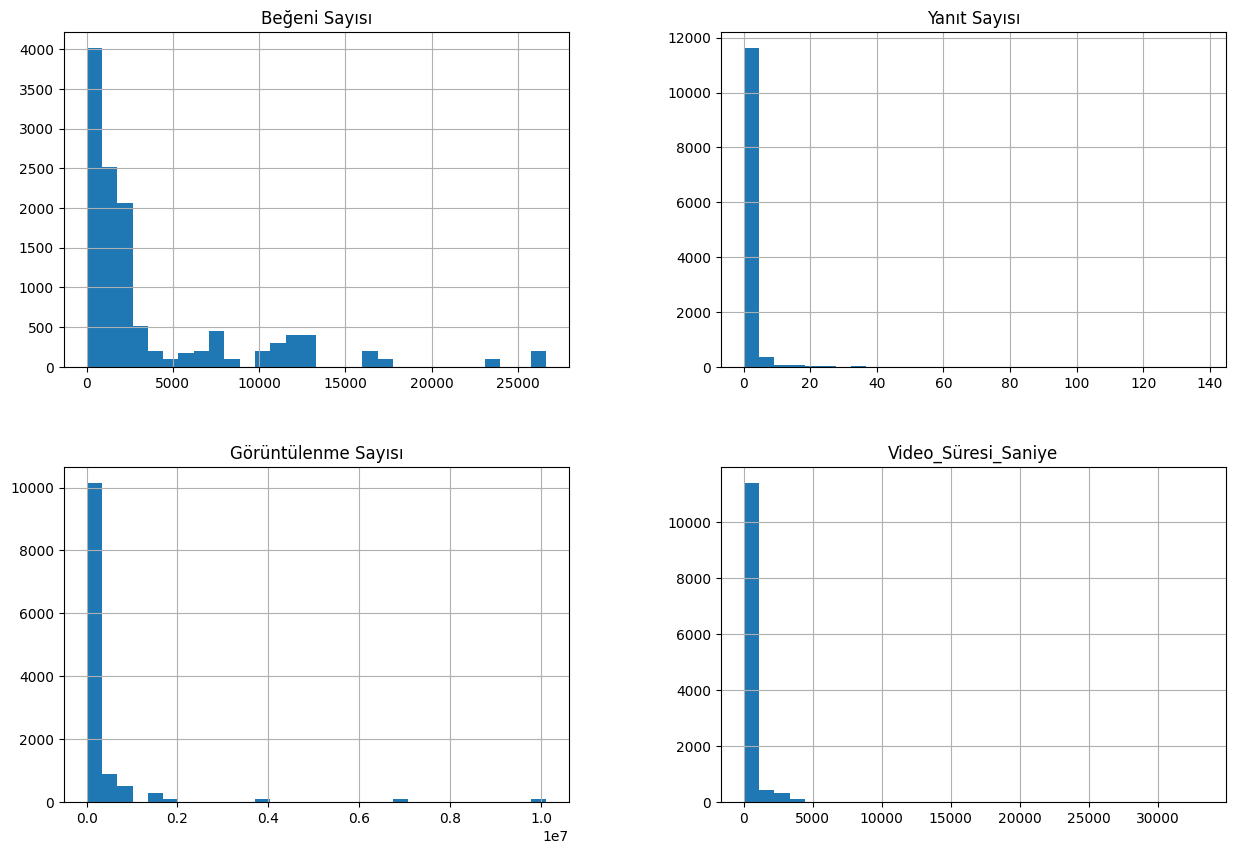

In [111]:

df.hist(figsize=(15, 10), bins=30)
plt.show()

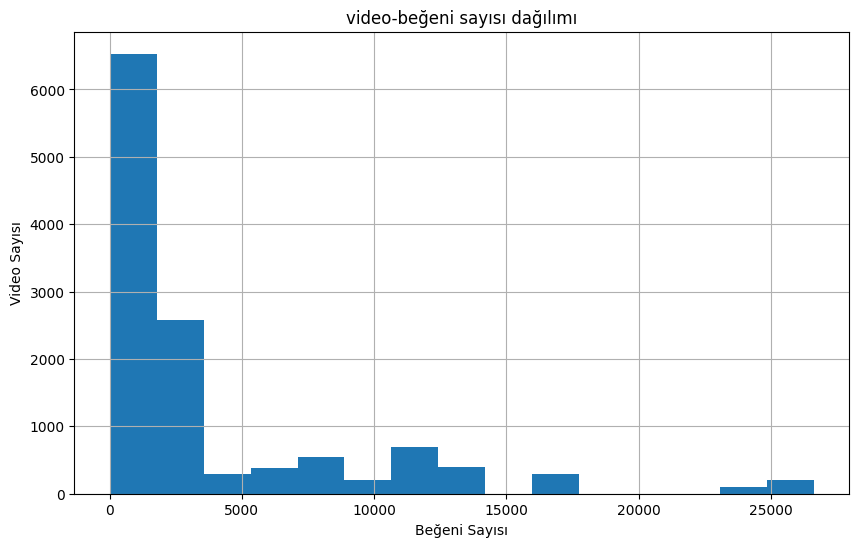

In [112]:
df['Beğeni Sayısı'].hist(bins=15, figsize=(10,6))
plt.xlabel("Beğeni Sayısı")
plt.ylabel("Video Sayısı")
plt.title("video-beğeni sayısı dağılımı")
plt.show()

<Axes: >

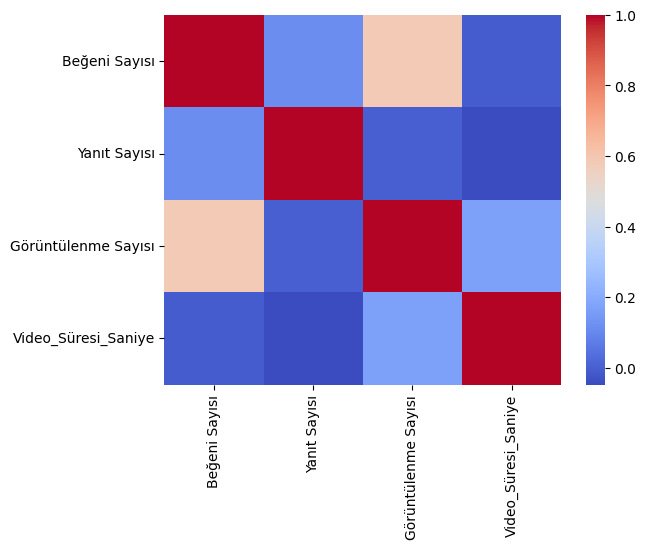

In [113]:
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')


<Axes: >

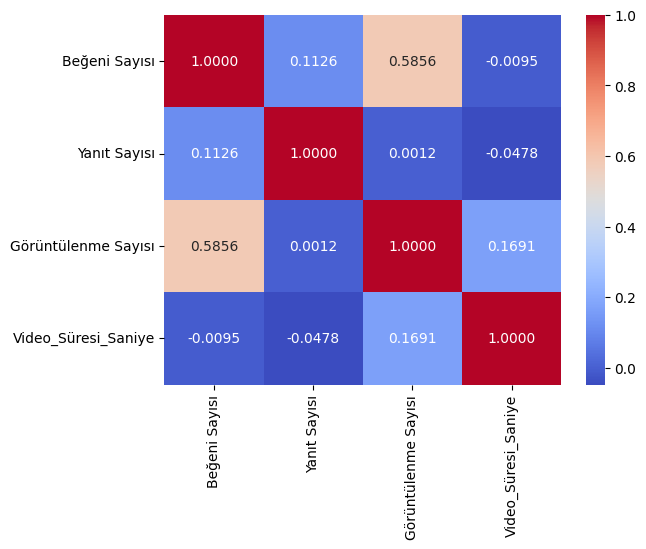

In [114]:
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,           #üstüne sayısal deger yazmak
    fmt=".4f",            # ondalık
    cmap="coolwarm",
    cbar=True             # Sağdaki renk skalası
)

In [ ]:
#numerikler icin


In [115]:
# Numerik kolonları seç

# Skewness ve Kurtosis hesapla
skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurtosis()

#sonuclar
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print("📊 Skewness ve Kurtosis:")
print(skew_kurt_df)

#skewness çarpıklık 0a yakın normal, pozitif sağ çarpık, negatif sol çarpık
#kurtosis basıklık 0 normale yakın, >0 sivri, <0 basık dağılım

📊 Skewness ve Kurtosis:
                      Skewness    Kurtosis
Beğeni Sayısı         2.211492    4.965938
Yanıt Sayısı         12.444797  234.397587
Görüntülenme Sayısı   6.539011   46.674238
Video_Süresi_Saniye  16.949897  481.642169


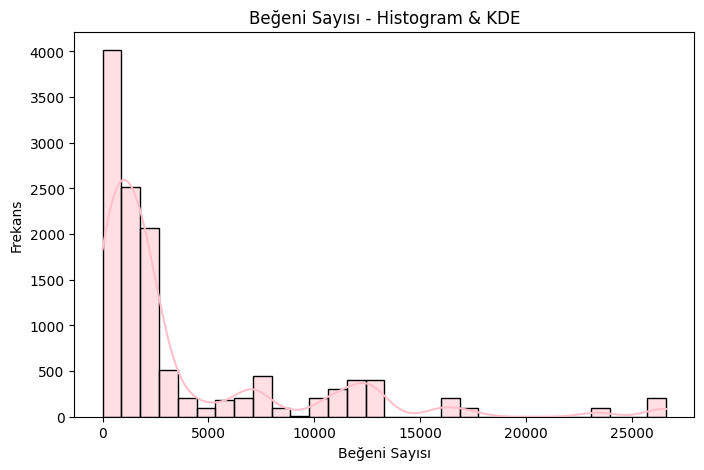

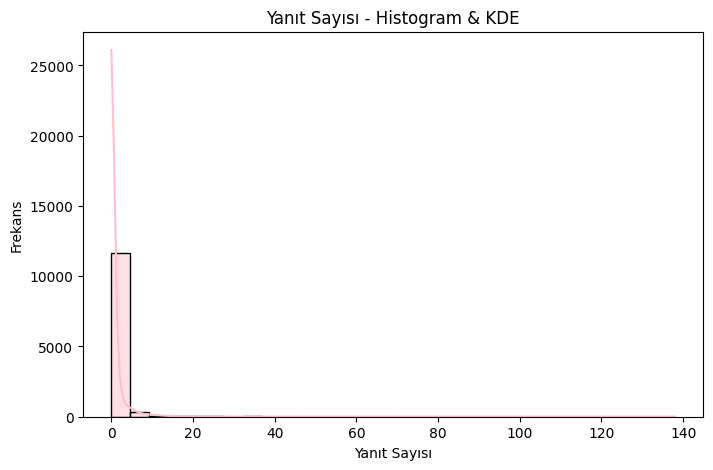

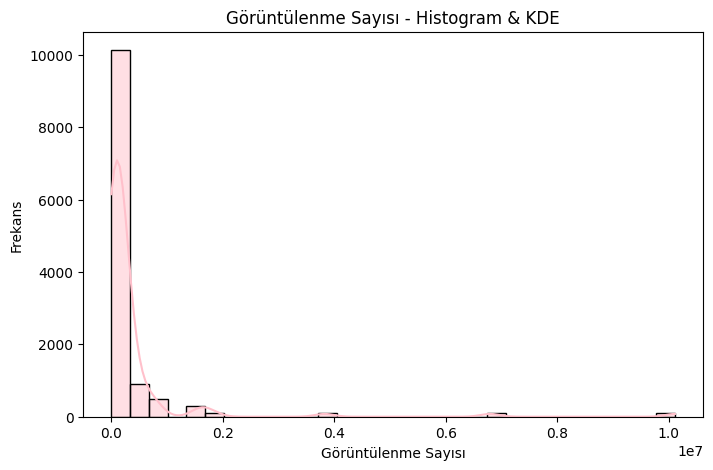

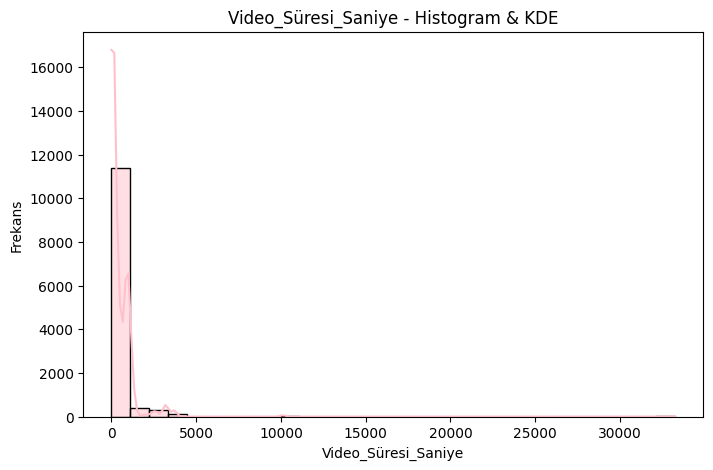

In [116]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color="pink", bins=30)  # kernel density estimate
    plt.title(f"{col} - Histogram & KDE")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()

In [118]:
# Aykırı değer sayısını hesaplamak için IQRInterquartile Range yöntemi çeyrekler arası açıklık
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 25. yüzde
    Q3 = df[col].quantile(0.75)  # 75. yüzde
    IQR = Q3 - Q1                # Çeyrekler arası aralık

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['column', 'outlier_count'])
print("🚨 Outlier Sayıları:")
print(outlier_df)

🚨 Outlier Sayıları:
                column  outlier_count
0        Beğeni Sayısı           1904
1         Yanıt Sayısı           2703
2  Görüntülenme Sayısı           1500
3  Video_Süresi_Saniye            439


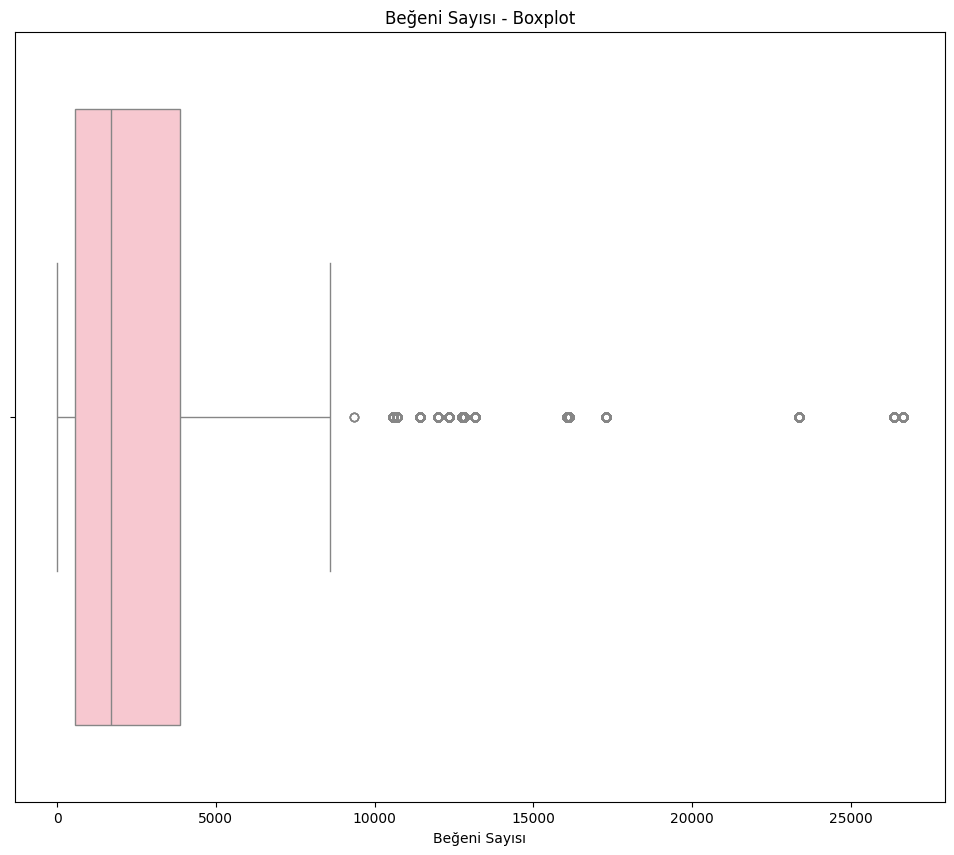

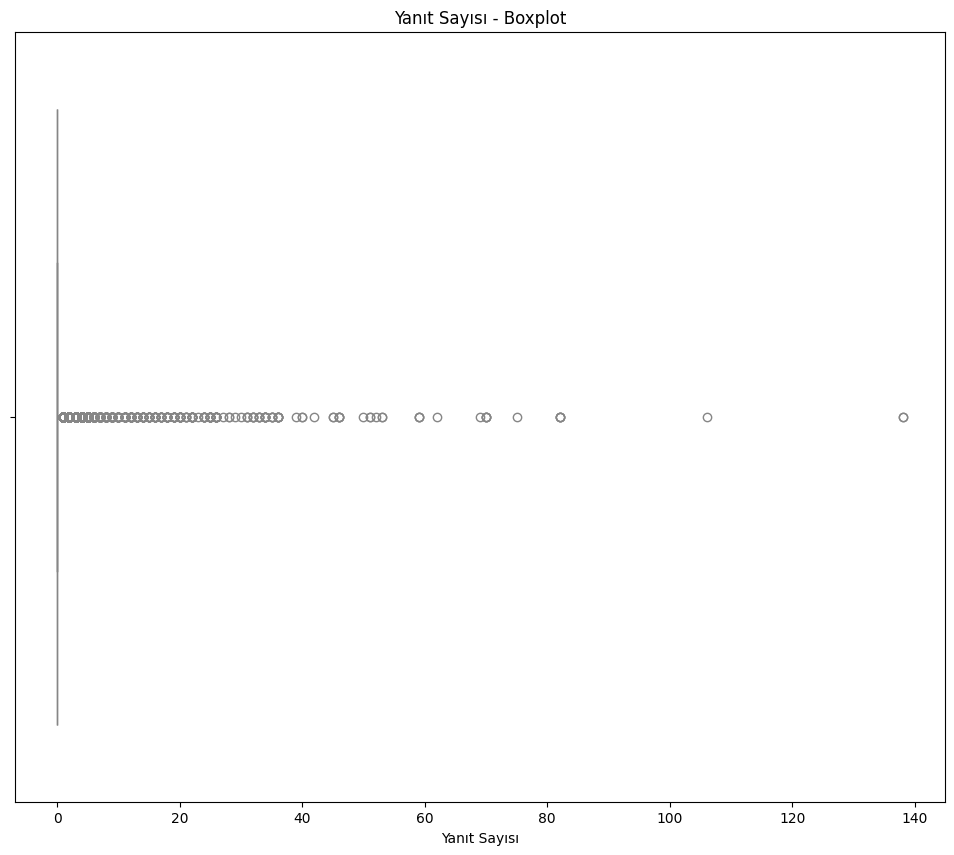

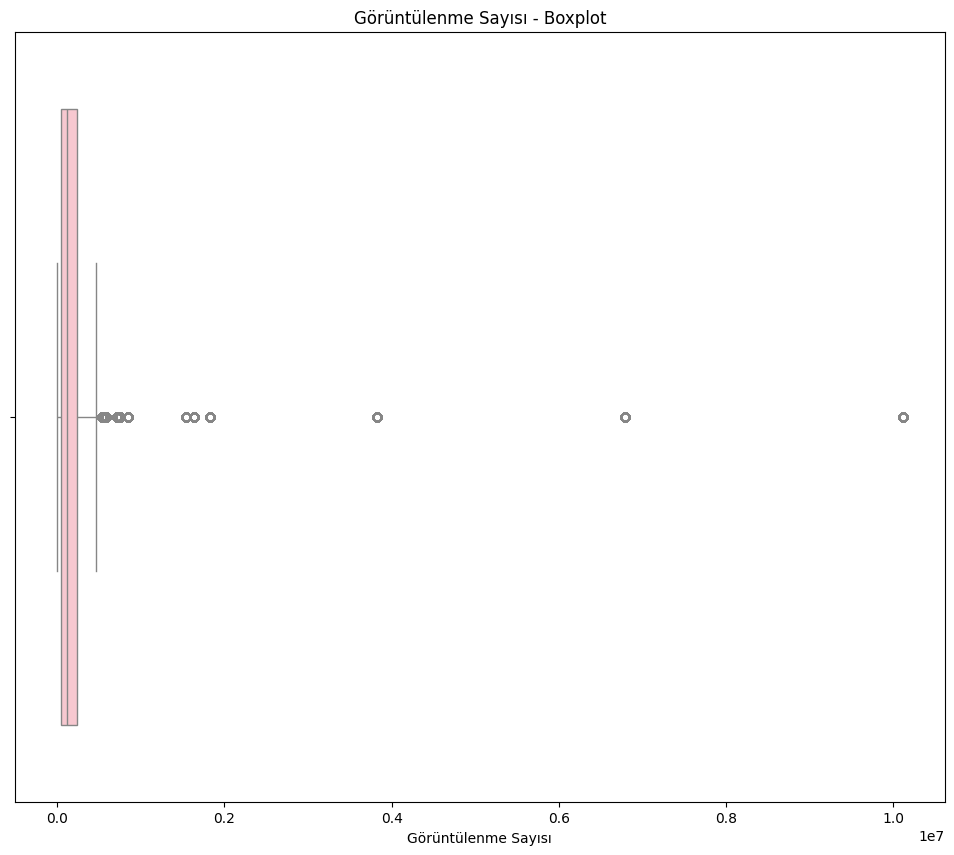

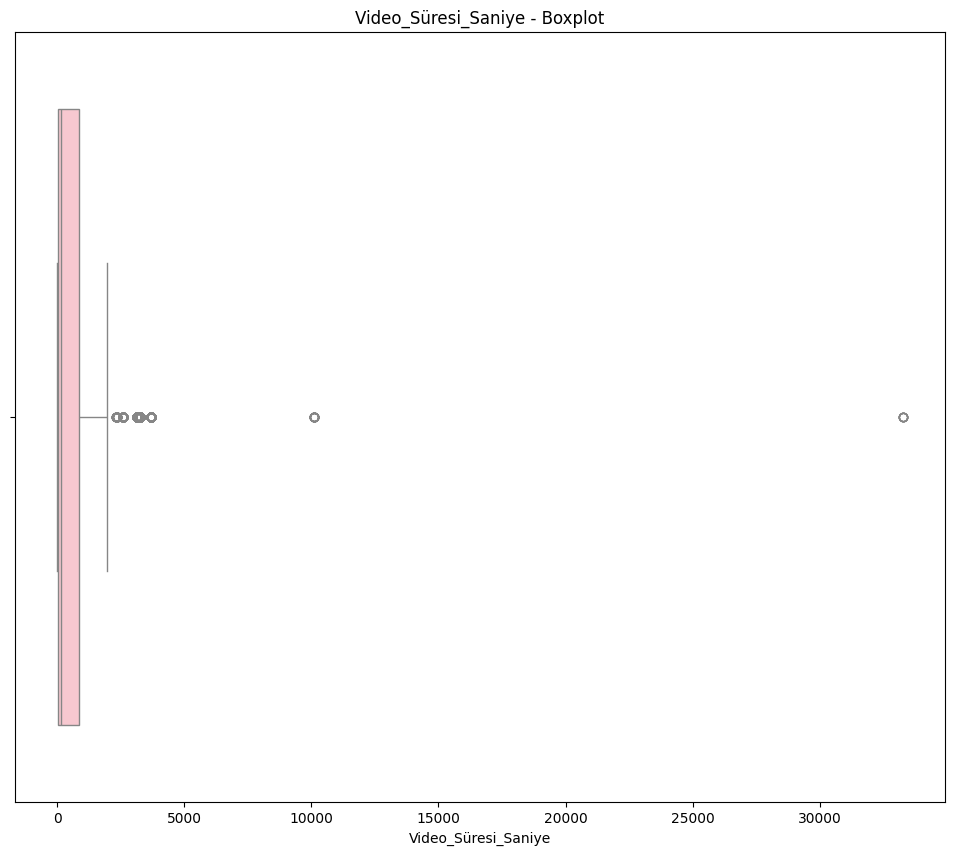

In [119]:
# Her numeric sütun için ayrı boxplot(kutu grafiği)
for col in numeric_cols:
    plt.figure(figsize=(12, 10))
    sns.boxplot(x=df[col], color="pink")
    plt.title(f"{col} - Boxplot")
    plt.xlabel(col)
    plt.show()

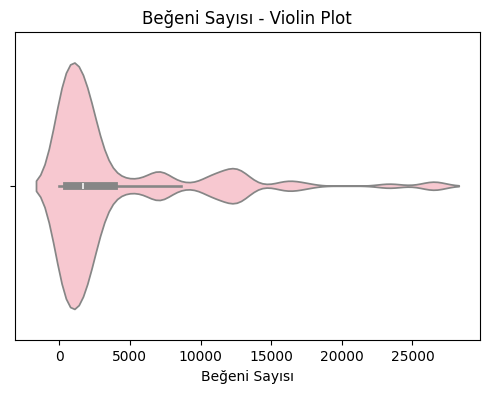

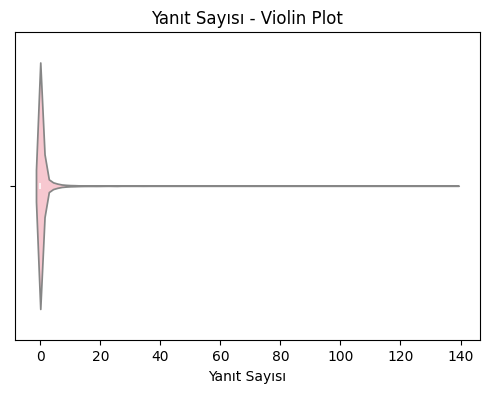

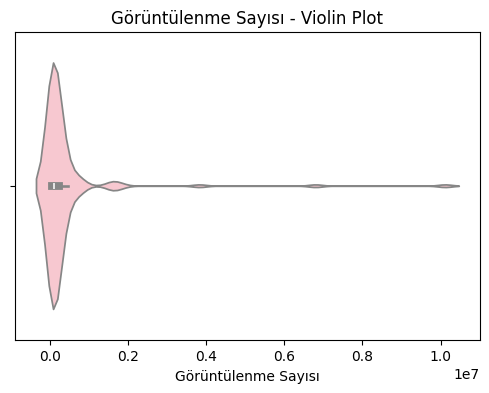

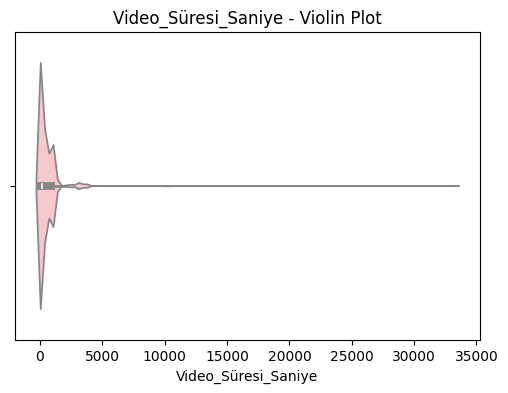

In [120]:
# Her numeric sütun için ayrı violin plot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=df[col], color="pink")
    plt.title(f"{col} - Violin Plot")
    plt.xlabel(col)
    plt.show()

In [121]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    print(f"\n{col} dağılımı:")
    print(df[col].value_counts().head(10))


Yorum Yapan dağılımı:
Yorum Yapan
@z.betulyuce1900    37
@yislah7931         30
@ayyldz5002         29
@dlngms             29
@Ya_sin             28
@verasitare4536     27
@EmreCetin6829      27
@recep1197          26
@HacerDoyuksakız    23
@aysearslan8854     23
Name: count, dtype: int64

Yorum dağılımı:
Yorum
Allah razı olsun                                                            119
❤                                                                           104
🌹🌹🌹                                                                          79
❤❤❤                                                                          31
🌹🌹                                                                           31
Allahümme Salli ala seyyidina Muhammedin ve ala ali seyyidina Muhammed 🌹     30
(￣ー￣) Özlemle.                                                               26
Teşekkürler                                                                  21
Çok güzel                                     

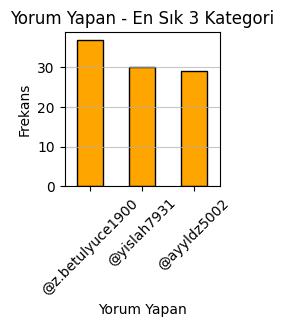

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127801 (\N{ROSE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


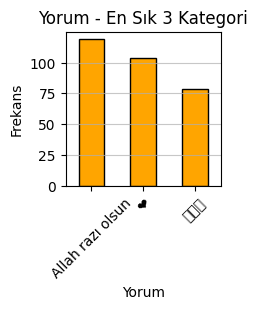

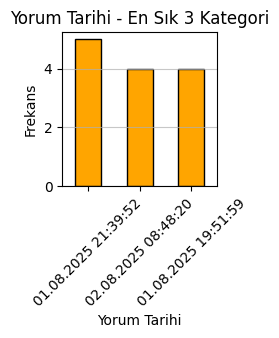

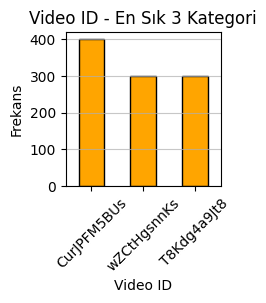

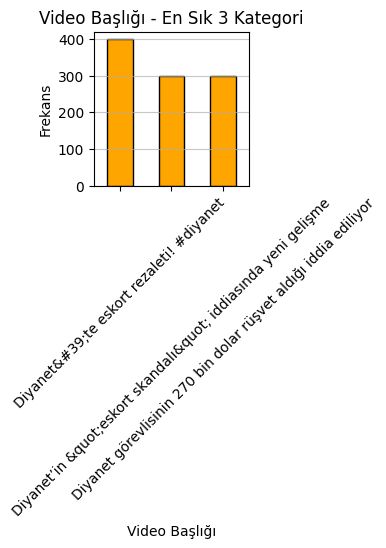

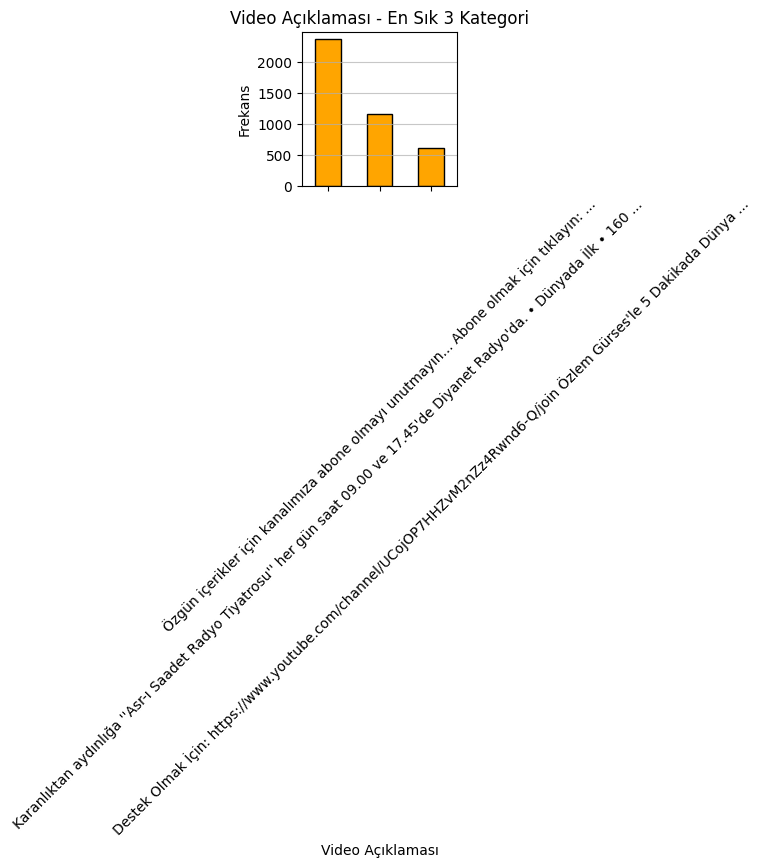

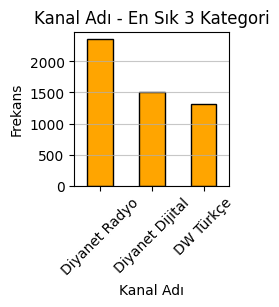

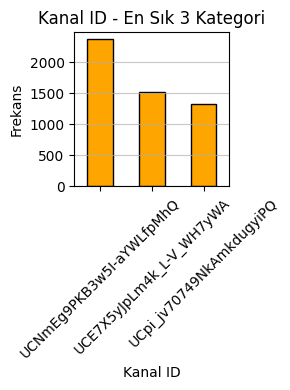

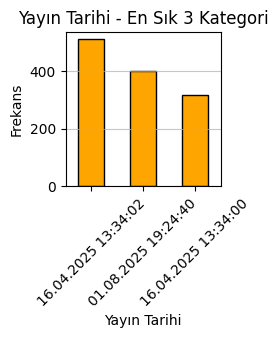

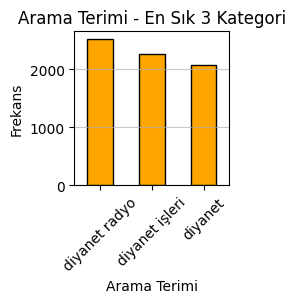

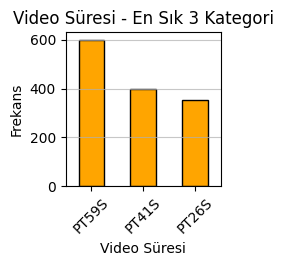

In [122]:
# 3. En sık kategoriler grafiği (ilk 3 kategori)
for col in categorical_cols:
    plt.figure(figsize=(2,2))
    top_categories = df[col].value_counts().head(3)
    top_categories.plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f"{col} - En Sık 3 Kategori")
    plt.ylabel("Frekans")
    plt.xticks(rotation=45) #xe 45 egim
    plt.grid(axis='y', alpha=0.7) #yye cizgi
    plt.show()

In [123]:
# 2. Kardinalite ve nadir oranları hesapla card. tekil deger sayisiyle ilgili
print("🔹 Kardinalite ve Nadir Oranlar:\n")
for col in categorical_cols:
    value_counts = df[col].value_counts()
    unique_count = value_counts.shape[0]  # Kaç benzersiz kategori var
    rare_count = (value_counts == 1).sum()  # Kaç kategori sadece 1 kez geçmiş
    rare_ratio = rare_count / len(df) * 100

    print(f"{col}:")
    print(f"  🔹 Benzersiz kategori sayısı: {unique_count}")
    print(f"  🔹 Tekrarlanmayan (nadir) kategori sayısı: {rare_count} ({rare_ratio:.2f}%)\n")


🔹 Kardinalite ve Nadir Oranlar:

Yorum Yapan:
  🔹 Benzersiz kategori sayısı: 7672
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 5161 (42.15%)

Yorum:
  🔹 Benzersiz kategori sayısı: 8816
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 6779 (55.37%)

Yorum Tarihi:
  🔹 Benzersiz kategori sayısı: 9810
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 7926 (64.74%)

Video ID:
  🔹 Benzersiz kategori sayısı: 260
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 29 (0.24%)

Video Başlığı:
  🔹 Benzersiz kategori sayısı: 258
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 29 (0.24%)

Video Açıklaması:
  🔹 Benzersiz kategori sayısı: 161
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 19 (0.16%)

Kanal Adı:
  🔹 Benzersiz kategori sayısı: 83
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 10 (0.08%)

Kanal ID:
  🔹 Benzersiz kategori sayısı: 83
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 10 (0.08%)

Yayın Tarihi:
  🔹 Benzersiz kategori sayısı: 248
  🔹 Tekrarlanmayan (nadir) kategori sayısı: 29 (0.24%)

Arama Terimi:
  🔹 Benzersi

In [124]:
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
yorumlar = df["Yorum"].dropna().astype(str)

metin = " ".join(yorumlar).lower()

metin = re.sub(r'[^\w\s]', '', metin) #noktalama işaretleri temizlemel icin
kelimeler = metin.split() #kelimleri ayırma

en_cok = Counter(kelimeler).most_common(20)

print("🔹 En Sık Geçen Kelimeler:")
for kelime, sayi in en_cok:
    print(f"{kelime}: {sayi}")

🔹 En Sık Geçen Kelimeler:
allah: 2164
olsun: 2111
bir: 1836
bu: 1680
çok: 1577
ve: 1557
razı: 1414
hocam: 1111
güzel: 984
ne: 928
de: 673
için: 626
da: 617
diyanet: 519
o: 516
var: 513
ya: 482
kadar: 444
her: 435
ben: 432


In [126]:
stop_words = set(stopwords.words('turkish'))

yorumlar = df["Yorum"].dropna().astype(str)

metin = " ".join(yorumlar).lower()
metin = re.sub(r'[^\w\s]', '', metin)
kelimeler = metin.split()

temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]

en_cok = Counter(temiz_kelimeler).most_common(20)

print("🔹 Stopwords Temizlenmiş En Sık Kelimeler:")
for kelime, sayi in en_cok:
    print(f"{kelime}: {sayi}")

🔹 Stopwords Temizlenmiş En Sık Kelimeler:
allah: 2164
olsun: 2111
bir: 1836
razı: 1414
hocam: 1111
güzel: 984
diyanet: 519
var: 513
kadar: 444
ben: 432
iyi: 391
böyle: 350
değil: 343
emeği: 324
yok: 321
mi: 311
olmuş: 291
inşallah: 290
sağlık: 282
rabbim: 280


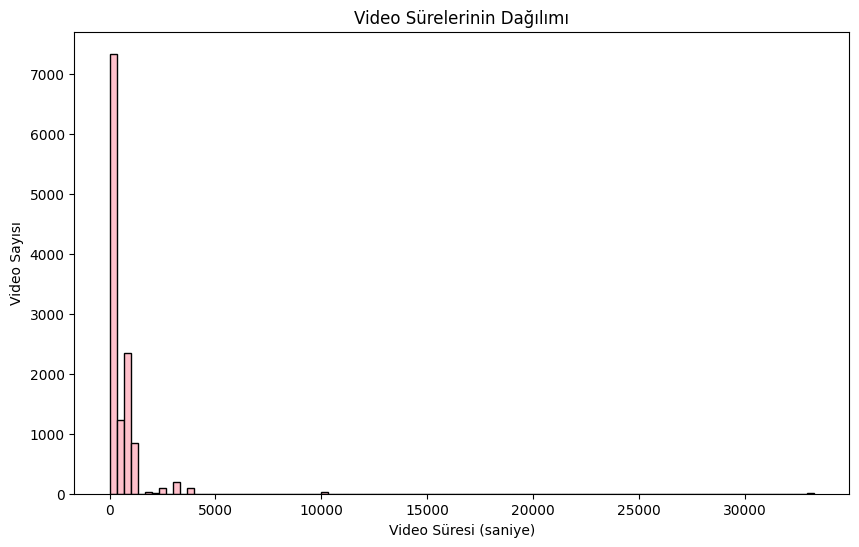

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df["Video_Süresi_Saniye"], bins=100, edgecolor='black', color="pink")
plt.xlabel("Video Süresi (saniye)")
plt.ylabel("Video Sayısı")
plt.title("Video Sürelerinin Dağılımı")
plt.show()

In [132]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('turkish'))

def temizle_metin(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zçğıöşü\s]', '', text)
    words = [word for word in text.split() if word not in stop_words]
    return words

df["Temiz_Yorum"] = df["Yorum"].dropna().apply(temizle_metin)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
from nltk.util import ngrams
from collections import Counter

def ngram_analizi(corpus, n=2, top=20): # corpus metin koleksiyonu yani tum yorumlar
    ngram_list = []
    for tokens in corpus:
        if isinstance(tokens, list):  # Sadece listeler üzerinde çalış
            ngram_list.extend(list(ngrams(tokens, n)))
    return Counter(ngram_list).most_common(top)

# NaN'leri düşürelim
yorumlar_temiz = df["Temiz_Yorum"].dropna()

#istege göre ngram olusturuyorum
bigram_sonuclar = ngram_analizi(yorumlar_temiz, n=2, top=20)
trigramlar = ngram_analizi(yorumlar_temiz, n=3, top=20)

print("🔹 En Sık Bigramlar:")
for gram, freq in bigram_sonuclar:
    print(f"{' '.join(gram)}: {freq}")


print("\n🔹 En Sık trigramlar:")
for gram, freq in trigramlar:
    print(f"{' '.join(gram)}: {freq}")





🔹 En Sık Bigramlar:
razı olsun: 1359
allah razı: 1049
güzel bir: 174
emeği geçen: 166
razi olsun: 135
güzel olmuş: 122
emeği geçenlerden: 122
elfü elfi: 120
teşekkür ederim: 116
geçen herkesten: 112
olsun hocam: 107
allah razi: 103
helal olsun: 100
sizin sayenizde: 86
olsun güzel: 86
allahümme salli: 86
diyanet işleri: 85
seyyidina muhammed: 85
amin amin: 78
hocam allah: 76

🔹 En Sık trigramlar:
allah razı olsun: 1030
emeği geçen herkesten: 107
allah razi olsun: 97
razı olsun hocam: 88
razı olsun güzel: 77
salli ala seyyidina: 72
allahümme salli ala: 71
emeği geçenlerden allah: 70
geçenlerden allah razı: 68
sizden razı olsun: 63
herkesten allah razı: 62
esselatu vesselamu aleyke: 61
geçen herkesten allah: 60
elfü elfi salatin: 60
elfi salatin elfü: 60
salatin elfü elfi: 60
elfü elfi selamin: 60
elfi selamin aleyke: 60
razı olsun emeği: 57
allah sizden razı: 54


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
stop_words = set(stopwords.words('turkish'))

# Yorumları al, NaN olanları temizle
yorumlar = df["Yorum"].dropna().astype(str)

# TF-IDF vektörizer
tfidf = TfidfVectorizer(
    max_features=100,   # En sık geçen 20 kelimeyi al

)

# TF-IDF matrisi
tfidf_matrix = tfidf.fit_transform(yorumlar)

# DataFrame'e dönüştür
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

print("📊 TF-IDF Skorları:")
print(tfidf_df.head())


📊 TF-IDF Skorları:
   abi  acaba  adam  ala  aleyke  ali  allah  ama  amin   an  ...  \
0  0.0    0.0   0.0  0.0     0.0  0.0    0.0  0.0   0.0  0.0  ...   
1  0.0    0.0   0.0  0.0     0.0  0.0    0.0  0.0   0.0  0.0  ...   
2  0.0    0.0   0.0  0.0     0.0  0.0    0.0  0.0   0.0  0.0  ...   
3  0.0    0.0   0.0  0.0     0.0  0.0    0.0  0.0   0.0  0.0  ...   
4  0.0    0.0   0.0  0.0     0.0  0.0    0.0  0.0   0.0  0.0  ...   

   teşekkürler  var        ve   ya  yok  zaman  zaten  çok   ın  şey  
0          0.0  0.0  0.000000  0.0  0.0    0.0    0.0  0.0  0.0  0.0  
1          0.0  0.0  0.000000  0.0  0.0    0.0    0.0  0.0  0.0  0.0  
2          0.0  0.0  0.000000  0.0  0.0    0.0    0.0  0.0  0.0  0.0  
3          0.0  0.0  0.000000  0.0  0.0    0.0    0.0  0.0  0.0  0.0  
4          0.0  0.0  0.245958  0.0  0.0    0.0    0.0  0.0  0.0  0.0  

[5 rows x 100 columns]
